In [5]:
import zipfile
import os

zip_path = '/content/Daily Historical Stock Prices (1970 - 2018).zip'

# Check if it's a valid zip file
if zipfile.is_zipfile(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('.')
        print("Zip file extracted.")
else:
    print("Error: The file is not a valid zip file.")


Zip file extracted.


In [8]:
# Load the datasets
historical_stocks = pd.read_csv('historical_stocks.csv')
historical_stock_prices = pd.read_csv('historical_stock_prices.csv')

print("Historical Stocks Dataset:")
print("Shape:", historical_stocks.shape)
print("Columns:", historical_stocks.columns.tolist())
print("\
First few rows:")
print(historical_stocks.head())

print("\
" + "="*50)
print("Historical Stock Prices Dataset:")
print("Shape:", historical_stock_prices.shape)
print("Columns:", historical_stock_prices.columns.tolist())
print("\
First few rows:")
print(historical_stock_prices.head())

Historical Stocks Dataset:
Shape: (6460, 5)
Columns: ['ticker', 'exchange', 'name', 'sector', 'industry']
First few rows:
  ticker exchange                                    name             sector  \
0    PIH   NASDAQ  1347 PROPERTY INSURANCE HOLDINGS, INC.            FINANCE   
1  PIHPP   NASDAQ  1347 PROPERTY INSURANCE HOLDINGS, INC.            FINANCE   
2   TURN   NASDAQ                180 DEGREE CAPITAL CORP.            FINANCE   
3   FLWS   NASDAQ                 1-800 FLOWERS.COM, INC.  CONSUMER SERVICES   
4   FCCY   NASDAQ           1ST CONSTITUTION BANCORP (NJ)            FINANCE   

                     industry  
0  PROPERTY-CASUALTY INSURERS  
1  PROPERTY-CASUALTY INSURERS  
2  FINANCE/INVESTORS SERVICES  
3      OTHER SPECIALTY STORES  
4        SAVINGS INSTITUTIONS  
Historical Stock Prices Dataset:
Shape: (20973889, 8)
Columns: ['ticker', 'open', 'close', 'adj_close', 'low', 'high', 'volume', 'date']
First few rows:
  ticker   open  close  adj_close    low   high   vo

In [9]:
# Check data types and basic info
print("Historical Stocks Dataset Info:")
print(historical_stocks.info())
print("\
Historical Stock Prices Dataset Info:")
print(historical_stock_prices.info())

# Check for missing values
print("\
Missing values in Historical Stocks:")
print(historical_stocks.isnull().sum())
print("\
Missing values in Historical Stock Prices:")
print(historical_stock_prices.isnull().sum())

Historical Stocks Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6460 entries, 0 to 6459
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    6460 non-null   object
 1   exchange  6460 non-null   object
 2   name      6460 non-null   object
 3   sector    5020 non-null   object
 4   industry  5020 non-null   object
dtypes: object(5)
memory usage: 252.5+ KB
None
Historical Stock Prices Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20973889 entries, 0 to 20973888
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ticker     object 
 1   open       float64
 2   close      float64
 3   adj_close  float64
 4   low        float64
 5   high       float64
 6   volume     int64  
 7   date       object 
dtypes: float64(5), int64(1), object(2)
memory usage: 1.3+ GB
None
Missing values in Historical Stocks:
ticker         0
exchange       0
name           0
se

In [10]:
# Data Cleaning - Step 2

# Handle missing values in historical_stocks
print("Before cleaning - Historical Stocks missing values:")
print(historical_stocks.isnull().sum())

# For stocks dataset, we'll keep rows with missing sector/industry as they might still be useful
# We could fill with 'Unknown' or leave as NaN - let's fill with 'Unknown' for analysis
historical_stocks['sector'] = historical_stocks['sector'].fillna('Unknown')
historical_stocks['industry'] = historical_stocks['industry'].fillna('Unknown')

print("\
After cleaning - Historical Stocks missing values:")
print(historical_stocks.isnull().sum())

# Check for duplicates in both datasets
print("\
Duplicates in Historical Stocks:", historical_stocks.duplicated().sum())
print("Duplicates in Historical Stock Prices:", historical_stock_prices.duplicated().sum())

# Remove duplicates if any
historical_stocks = historical_stocks.drop_duplicates()
historical_stock_prices = historical_stock_prices.drop_duplicates()

print("\
After removing duplicates:")
print("Historical Stocks shape:", historical_stocks.shape)
print("Historical Stock Prices shape:", historical_stock_prices.shape)

Before cleaning - Historical Stocks missing values:
ticker         0
exchange       0
name           0
sector      1440
industry    1440
dtype: int64
After cleaning - Historical Stocks missing values:
ticker      0
exchange    0
name        0
sector      0
industry    0
dtype: int64
Duplicates in Historical Stocks: 0
Duplicates in Historical Stock Prices: 0
After removing duplicates:
Historical Stocks shape: (6460, 5)
Historical Stock Prices shape: (20973889, 8)


In [11]:
# Convert date column to datetime and set as index
print("Original date column sample:")
print(historical_stock_prices['date'].head())
print("Date column type:", historical_stock_prices['date'].dtype)

# Convert to datetime
historical_stock_prices['date'] = pd.to_datetime(historical_stock_prices['date'])

# Set date as index
historical_stock_prices = historical_stock_prices.set_index('date')

print("\
After conversion:")
print("Date index sample:")
print(historical_stock_prices.index[:5])
print("Date index type:", historical_stock_prices.index.dtype)

# Check the date range
print("\
Date range:")
print("Start date:", historical_stock_prices.index.min())
print("End date:", historical_stock_prices.index.max())

Original date column sample:
0    2013-05-08
1    2013-05-09
2    2013-05-10
3    2013-05-13
4    2013-05-14
Name: date, dtype: object
Date column type: object
After conversion:
Date index sample:
DatetimeIndex(['2013-05-08', '2013-05-09', '2013-05-10', '2013-05-13',
               '2013-05-14'],
              dtype='datetime64[ns]', name='date', freq=None)
Date index type: datetime64[ns]
Date range:
Start date: 1970-01-02 00:00:00
End date: 2018-08-24 00:00:00


In [12]:
# Step 3 - Data Segmentation by Decade
# Create decade column
historical_stock_prices['decade'] = (historical_stock_prices.index.year // 10) * 10

print("Decade distribution:")
print(historical_stock_prices['decade'].value_counts().sort_index())

# Create separate DataFrames for each decade
decades = {}
for decade in sorted(historical_stock_prices['decade'].unique()):
    decade_data = historical_stock_prices[historical_stock_prices['decade'] == decade].copy()
    decades[decade] = decade_data
    print(f"\
Decade {decade}s: {len(decade_data)} records")
    print(f"Date range: {decade_data.index.min()} to {decade_data.index.max()}")

print(f"\
Total decades available: {list(decades.keys())}")

Decade distribution:
decade
1970     164499
1980    1470571
1990    3427832
2000    6572053
2010    9338934
Name: count, dtype: int64
Decade 1970s: 164499 records
Date range: 1970-01-02 00:00:00 to 1979-12-31 00:00:00
Decade 1980s: 1470571 records
Date range: 1980-01-02 00:00:00 to 1989-12-29 00:00:00
Decade 1990s: 3427832 records
Date range: 1990-01-02 00:00:00 to 1999-12-31 00:00:00
Decade 2000s: 6572053 records
Date range: 2000-01-03 00:00:00 to 2009-12-31 00:00:00
Decade 2010s: 9338934 records
Date range: 2010-01-04 00:00:00 to 2018-08-24 00:00:00
Total decades available: [np.int64(1970), np.int64(1980), np.int64(1990), np.int64(2000), np.int64(2010)]


In [13]:
# Step 4 - Merge datasets and calculate summary statistics
# Merge stock prices with stock information to include sector data
merged_data = historical_stock_prices.reset_index().merge(
    historical_stocks[['ticker', 'sector', 'industry']],
    on='ticker',
    how='left'
).set_index('date')

print("Merged dataset shape:", merged_data.shape)
print("Columns:", merged_data.columns.tolist())

# Check merge success
print("\
Merge statistics:")
print("Records with sector info:", merged_data['sector'].notna().sum())
print("Records without sector info:", merged_data['sector'].isna().sum())

# Update decades dictionary with merged data
decades_merged = {}
for decade in sorted(merged_data['decade'].unique()):
    decade_data = merged_data[merged_data['decade'] == decade].copy()
    decades_merged[decade] = decade_data

print("\
Sample of merged data:")
print(merged_data[['ticker', 'close', 'volume', 'sector', 'decade']].head())

Merged dataset shape: (20973889, 10)
Columns: ['ticker', 'open', 'close', 'adj_close', 'low', 'high', 'volume', 'decade', 'sector', 'industry']
Merge statistics:
Records with sector info: 20973889
Records without sector info: 0
Sample of merged data:
           ticker  close   volume   sector  decade
date                                              
2013-05-08    AHH  11.58  4633900  FINANCE    2010
2013-05-09    AHH  11.55   275800  FINANCE    2010
2013-05-10    AHH  11.60   277100  FINANCE    2010
2013-05-13    AHH  11.65   147400  FINANCE    2010
2013-05-14    AHH  11.53   184100  FINANCE    2010


In [15]:
# Step 4 - Calculate summary statistics per decade

summary_stats_per_decade = {}

for decade, df in decades_merged.items():
    summary_stats = df[['open', 'high', 'low', 'close', 'volume']].agg(['mean', 'median', 'std'])
    summary_stats_per_decade[decade] = summary_stats
    print(f"\
Summary statistics for {decade}s:")
    display(summary_stats)

Summary statistics for 1970s:


,open,high,low,close,volume
mean,12.491493,12.640192,12.366931,12.491549,7.248936e+05
median,2.791667,2.840909,2.765625,2.791667,1.872000e+05
std,46.981142,47.481931,46.513085,46.985360,1.377366e+06


Summary statistics for 1980s:


,open,high,low,close,volume
mean,16.814261,17.095074,16.561523,16.824845,8.375234e+05
median,5.000000,5.083333,4.958333,5.000000,6.460000e+04
std,573.048093,582.814179,562.257404,575.029287,4.510088e+06


Summary statistics for 1990s:


,open,high,low,close,volume
mean,45.291459,46.871896,43.814977,45.303495,8.635272e+05
median,10.583831,10.750000,10.437500,10.593750,6.220000e+04
std,1391.110191,1464.629619,1329.334616,1391.576526,5.834012e+06


Summary statistics for 2000s:


,open,high,low,close,volume
mean,122.295850,125.646271,119.170676,122.440812,1.383562e+06
median,16.580000,16.866667,16.299999,16.584999,1.334000e+05
std,4485.636333,4703.968766,4318.821828,4509.781698,9.230143e+06


Summary statistics for 2010s:


,open,high,low,close,volume
mean,65.261101,66.723946,63.917347,65.278332,1.320505e+06
median,20.010000,20.285000,19.750000,20.010000,1.654000e+05
std,1820.181589,1941.571402,1763.144292,1850.127729,1.770789e+07


/tmp/ipython-input-16-2065636895.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['close'].resample('M').mean()
/tmp/ipython-input-16-2065636895.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['close'].resample('M').mean()
/tmp/ipython-input-16-2065636895.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['close'].resample('M').mean()


Generating Time Series Plots for Average Monthly Close Prices per Decade:


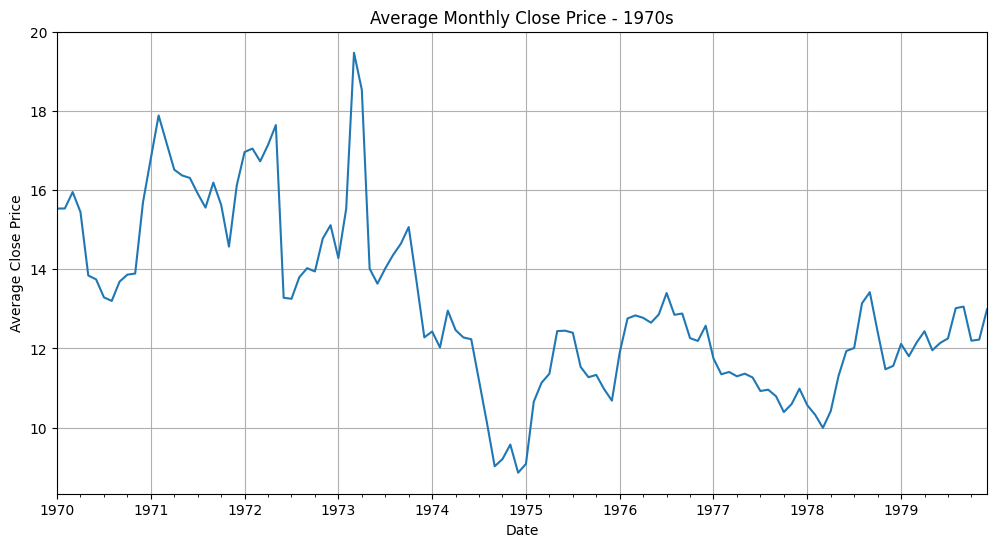

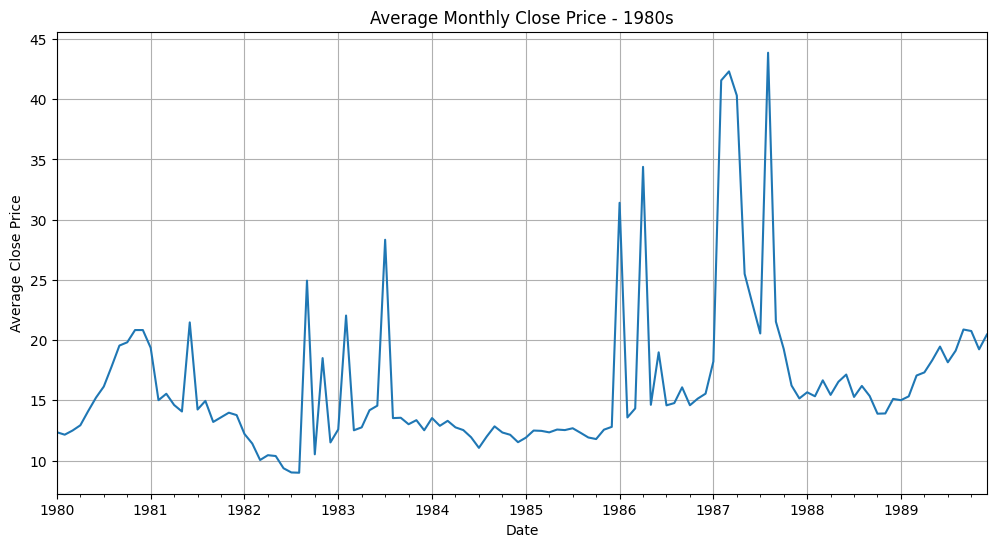

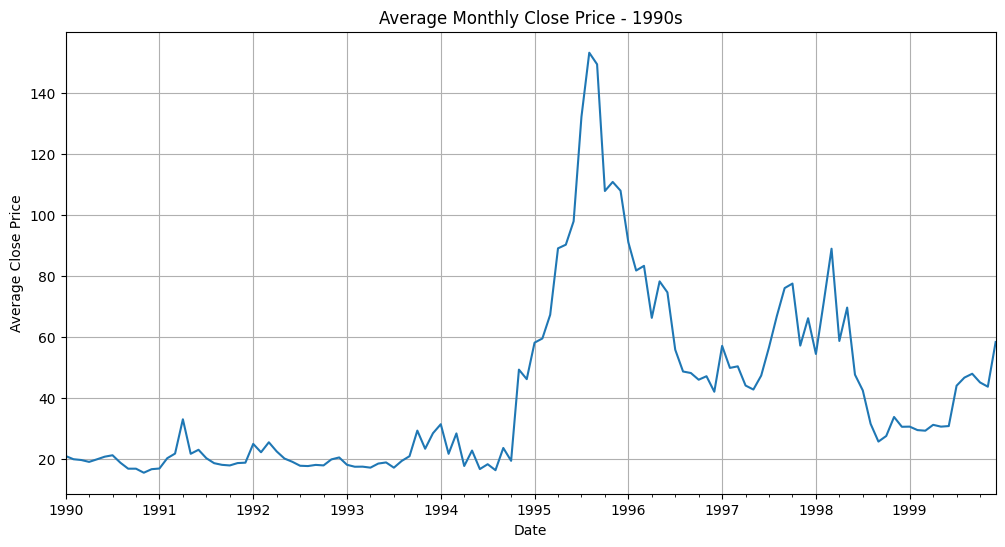

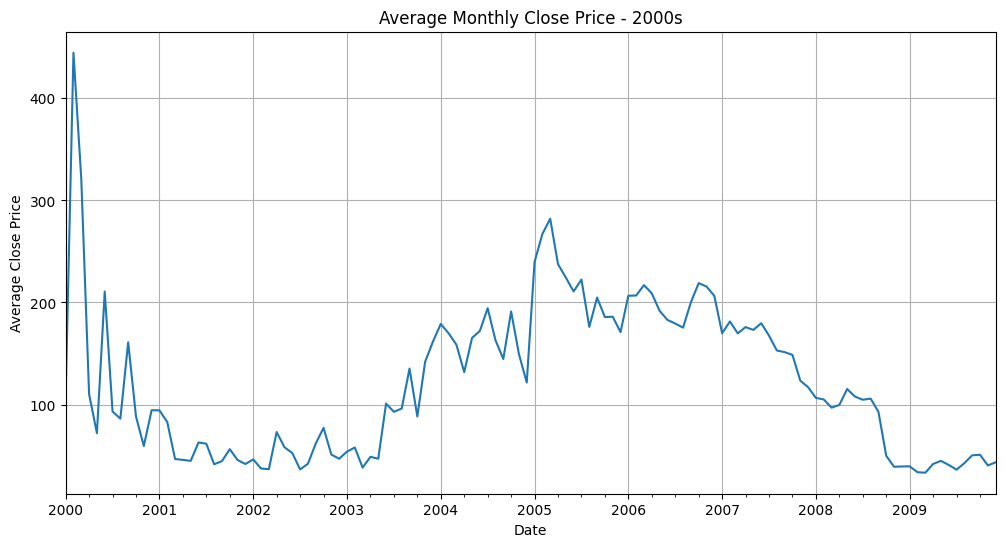

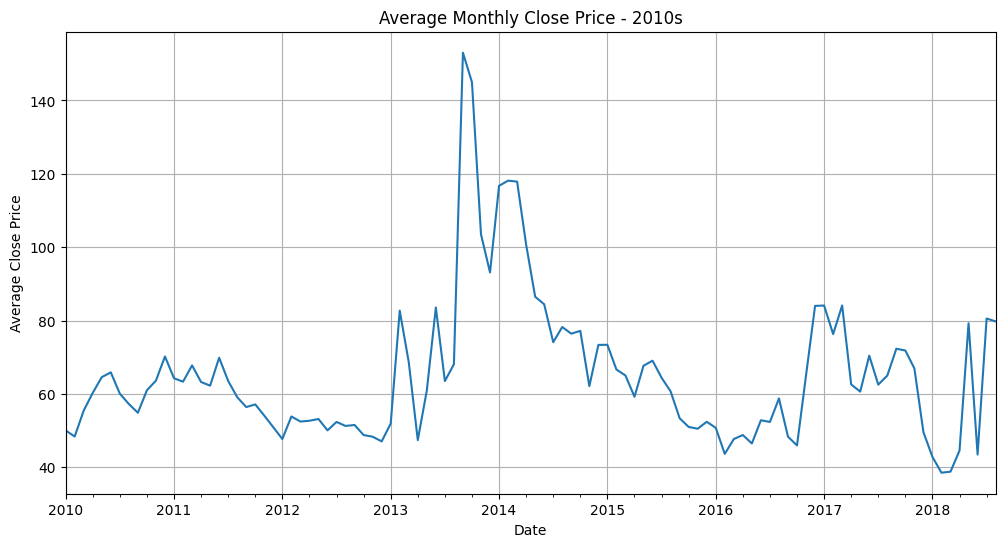

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate average monthly closing prices per decade
monthly_avg_close_per_decade = {}

for decade, df in decades_merged.items():
    # Resample to monthly frequency and calculate the mean of the close price
    monthly_avg = df['close'].resample('M').mean()
    monthly_avg_close_per_decade[decade] = monthly_avg

# Step 2: Create time series plots
print("Generating Time Series Plots for Average Monthly Close Prices per Decade:")

for decade, monthly_avg in monthly_avg_close_per_decade.items():
    plt.figure(figsize=(12, 6))
    monthly_avg.plot()
    plt.title(f'Average Monthly Close Price - {decade}s')
    plt.xlabel('Date')
    plt.ylabel('Average Close Price')
    plt.grid(True)
    plt.show()

Generating Histograms for Volume per Decade:


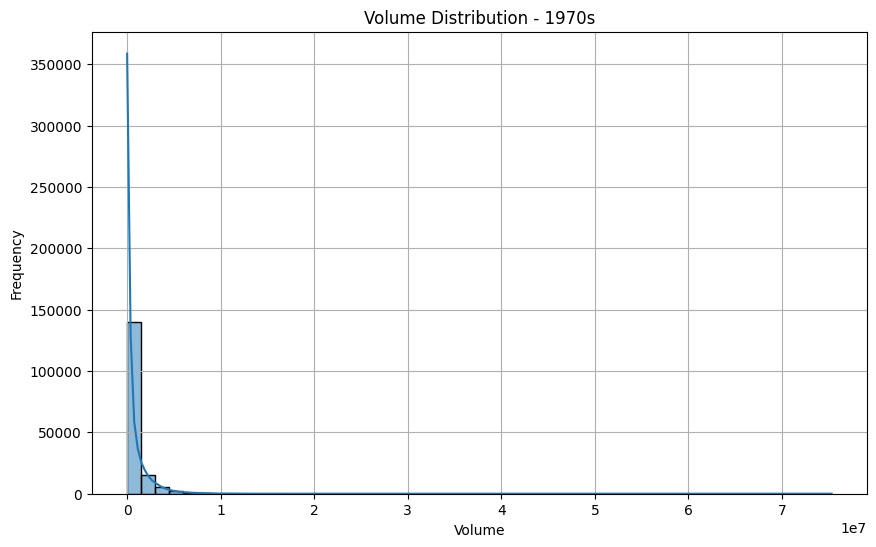

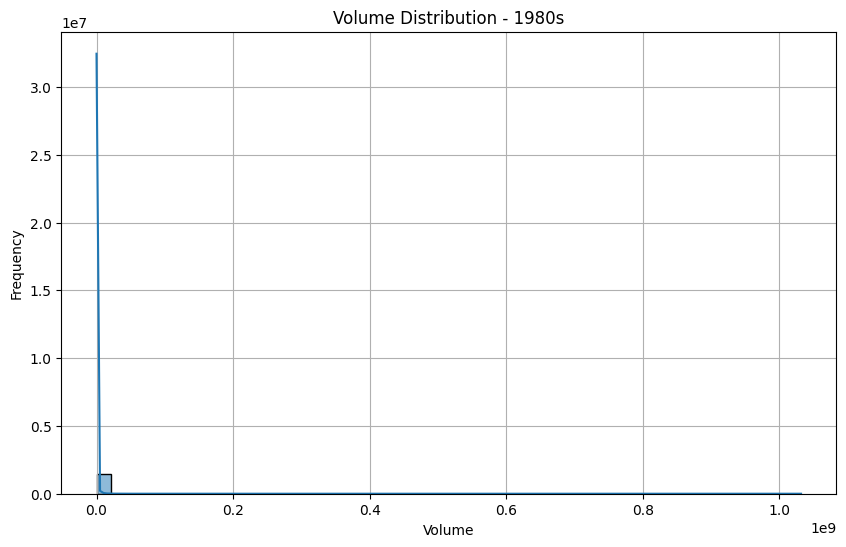

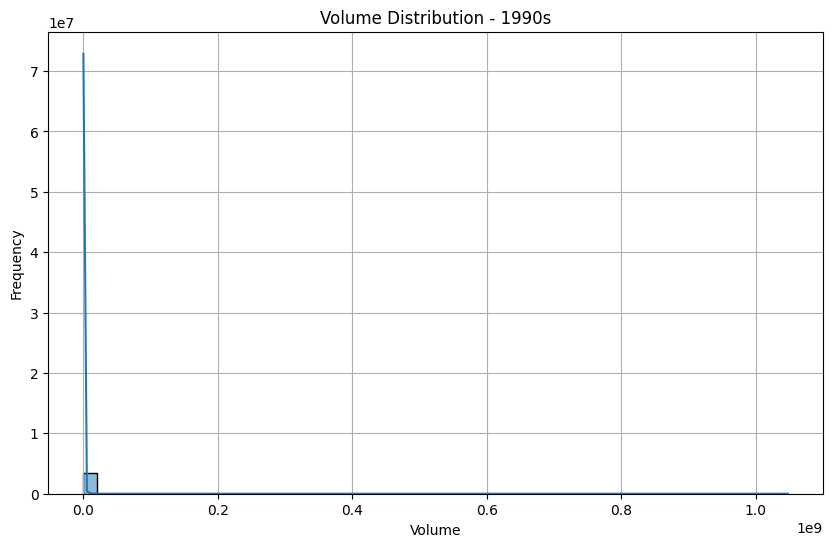

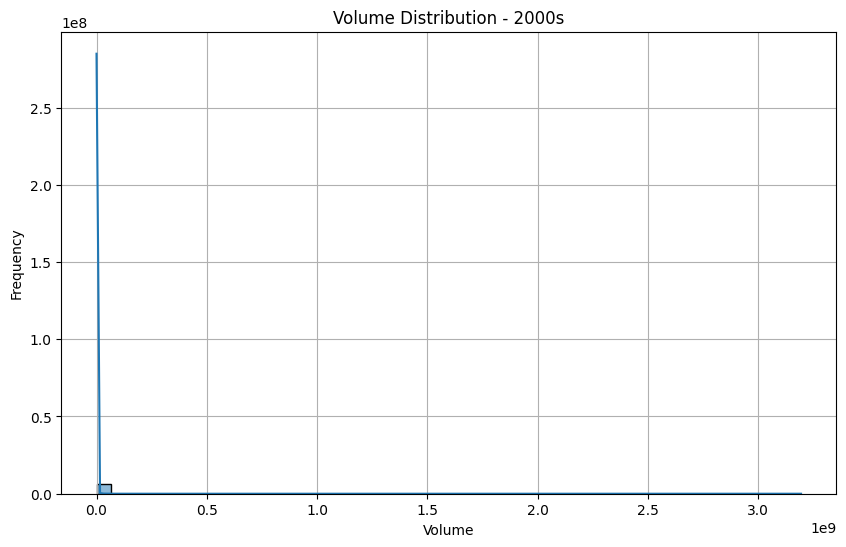

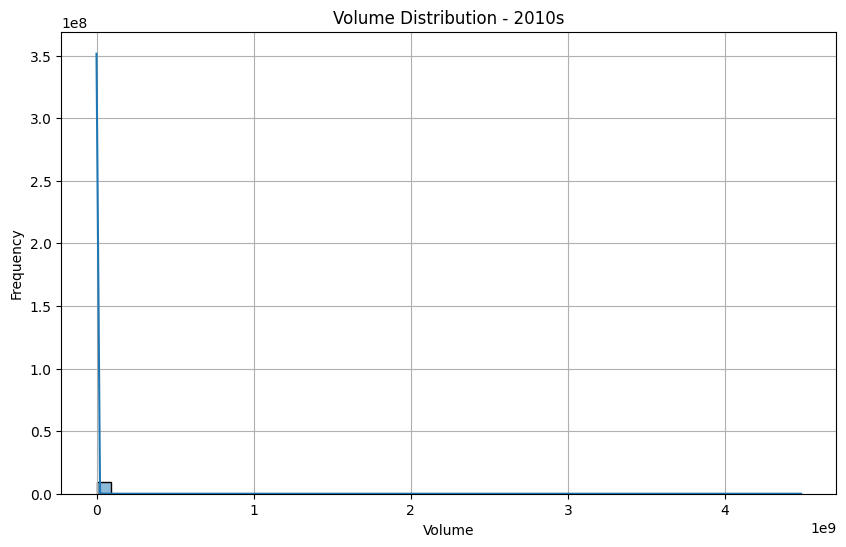

In [17]:
# Step 3: Create volume histograms
print("Generating Histograms for Volume per Decade:")

for decade, df in decades_merged.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='volume', bins=50, kde=True)
    plt.title(f'Volume Distribution - {decade}s')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Generating Box Plots for High and Low Prices per Decade:


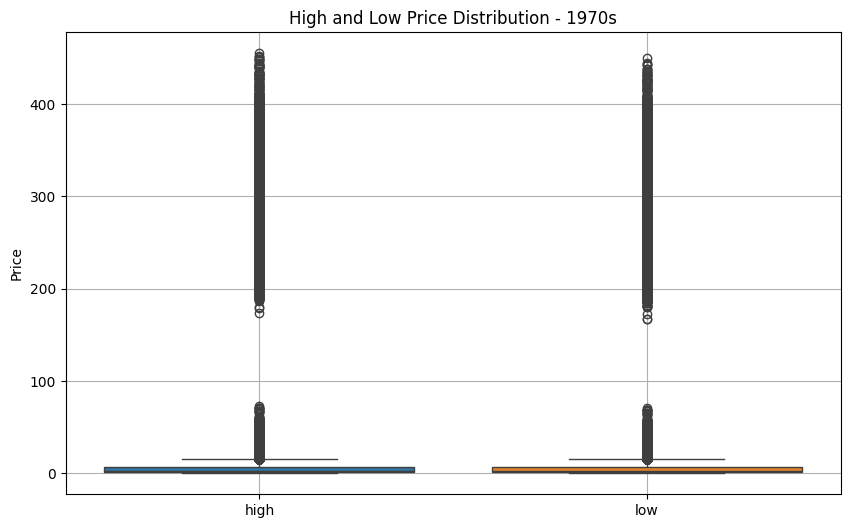

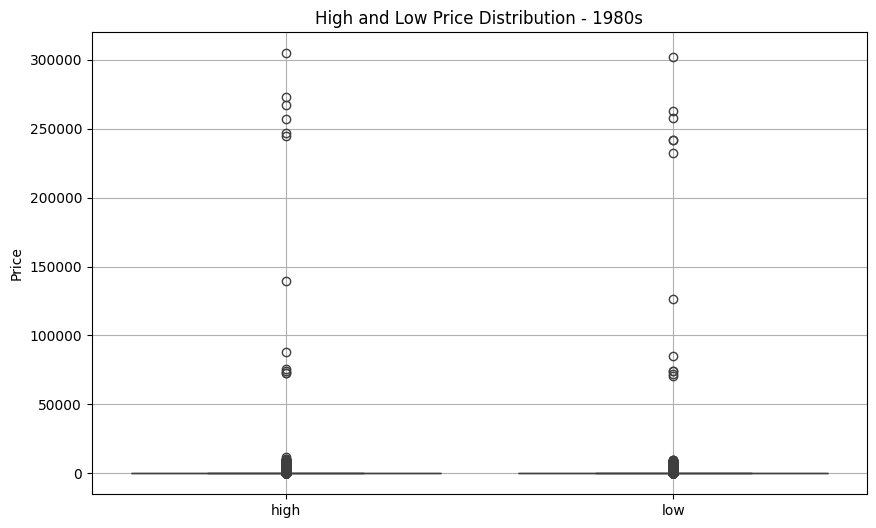

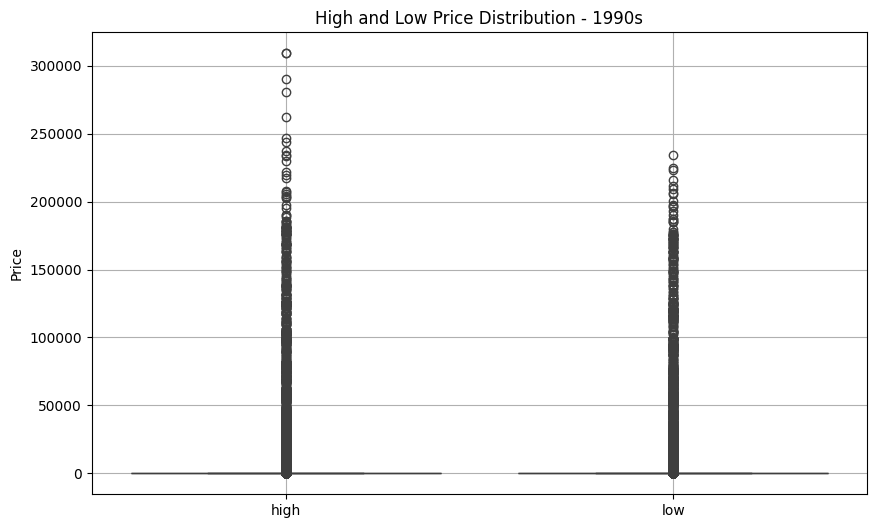

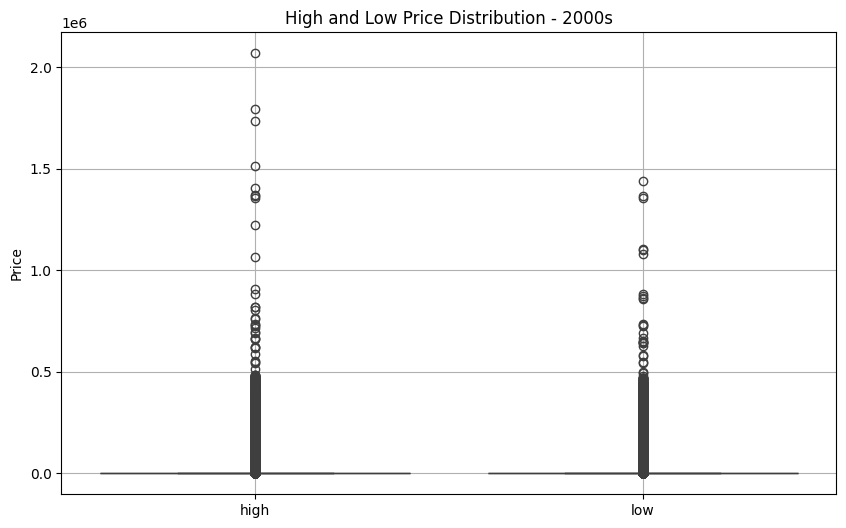

In [ ]:
# Step 4: Create box plots for High and Low prices
print("Generating Box Plots for High and Low Prices per Decade:")

for decade, df in decades_merged.items():
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[['high', 'low']])
    plt.title(f'High and Low Price Distribution - {decade}s')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()